Linear Regression (Kristin)
1.  run with default parameters
2.  SGD Regressor with different parameters
    a. l1
    b. l2
    c. alpha
    d. iterations
3.  need to scale data for SGD Regressor
4.  Used feature selection techniques to determine other features to remove to improve model performance



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



vgsales = pd.read_excel('vgsales_v5.xlsx')

vgsales.head()

# Create dummy variables for | Genre | First_Party | Platform_Type

#dummy variables for Genre
dummy_genre = pd.get_dummies(vgsales.Genre)
dummy_genre

#dummy variables for First Party
dummy_first_party = pd.get_dummies(vgsales.First_Party)
dummy_first_party

#dummy variables for Platform Type
dummy_platform_type = pd.get_dummies(vgsales.Platform_Type)
dummy_platform_type

#Merge dummy frames into one dataset with original vgsales datframe
merged_vgsales = pd.concat([vgsales, dummy_genre, dummy_first_party, dummy_platform_type], axis='columns')

merged_vgsales





,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Microsoft,Nintendo,Other,PC,SEGA,Sony,Console,HH,Other,PC
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,...,0,1,0,0,0,0,1,0,0,0
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0,1,0,0,0,0,1,0,0,0
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0,1,0,0,0,0,1,0,0,0
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0,1,0,0,0,0,1,0,0,0
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,15977,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,...,0,1,0,0,0,0,0,1,0,0
15975,15978,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,...,0,1,0,0,0,0,1,0,0,0
15976,15979,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,...,0,0,0,0,0,1,1,0,0,0
15977,15980,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,...,0,1,0,0,0,0,0,1,0,0


In [2]:
vgsales_df = pd.DataFrame(merged_vgsales)


In [3]:
#drop Rank (it is perfectly correlated with sales because it is based on global sales & is a result of sales
# drop Name (a significant number of dummy variables would have to be created and we are not analyzing the impact of name, but trying to understand impact of genre, platform and region on sales)
#drop Platform (we have created Platform Type and First Parties categories that are more meaningful than Platform)
#drop Publisher (similar reason as Name)

vgsales_df2 = vgsales_df.drop(columns = ["Rank","Name", "Platform", "Publisher","Genre", "First_Party", "Platform_Type","Year_1_Sales", "Year", "Atari","SEGA", "Other"])
print(vgsales_df2)

# I have removed futher features:  
#Year (it is historical and not something we can predict for)
#Year_1_Sales (it is a formula we created based on global sales, so it has 1.0 correlation with the target)
#Atari (the platform no longer exists)
#SEGA (the platform no longer exists)
#Other (the platforms no longer exists)
# of features = 24

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0         41.49     29.02      3.77         8.46         82.74   
1         29.08      3.58      6.81         0.77         40.24   
2         15.85     12.88      3.79         3.31         35.82   
3         15.75     11.01      3.28         2.96         33.00   
4         11.27      8.89     10.22         1.00         31.37   
...         ...       ...       ...          ...           ...   
15974      0.01      0.00      0.00         0.00          0.01   
15975      0.01      0.00      0.00         0.00          0.01   
15976      0.00      0.00      0.00         0.00          0.01   
15977      0.00      0.01      0.00         0.00          0.01   
15978      0.01      0.00      0.00         0.00          0.01   

       Years_In_Market  Avg_Annual_Sales  Action  Adventure  Fighting  ...  \
0                   10          8.274000       0          0         0  ...   
1                   31          1.298065       0   

In [4]:
#Create X, y

X = vgsales_df2.drop(columns = "Global_Sales")
y = vgsales_df2.Global_Sales

In [5]:
#create test/train/validation sets, 80% = train, 10% = test, 10% = validation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

print(X_val.shape)
print(y_val.shape)
print(X_train.shape)
print(y_train.shape)

(1598, 24)
(1598,)
(12783, 24)
(12783,)


In [6]:
#import libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from scipy import stats
from math import sqrt
from sklearn.metrics import r2_score
import timeit
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [7]:
#Model 1:  Linear Regression with default parameters

lin_reg1 = LinearRegression()
lin_reg1.fit(X_train, y_train)


y_pred1 = lin_reg1.predict(X_val)
print("mse:",mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r-squared:", r2_score(y_val, y_pred1))
print("training time:", timeit.timeit())

#strong results with an R-squared of 100%

mse: 2.7220071646076635e-05
rmse: 0.005217285850523875
r-squared: 0.9999867893979695
training time: 0.011742700000000106


In [8]:
#To retrieve the intercept:
print("Intercept:", lin_reg1.intercept_)
#For retrieving the slopes:
print("Coefficients:",lin_reg1.coef_)



Intercept: 0.00011611011161272167
Coefficients: [ 9.99851725e-01  9.99902541e-01  1.00002834e+00  9.99609799e-01
  4.04026028e-06  1.44889684e-04 -1.11902516e-04 -1.52865564e-04
 -4.31243676e-04 -4.53148555e-05  3.72654960e-04  3.33970245e-05
 -2.76289398e-04  9.67691888e-05 -2.48350719e-05 -6.45591485e-05
  5.13322817e-05 -2.57867484e-04 -1.99484130e-04  4.80016010e-04
 -7.66000933e-04  7.06685684e-04  6.39780672e-04  4.80016010e-04]


In [9]:
#import libraries for additional regression analysis statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_1 = sm.add_constant(X_train)
X_val_1 = sm.add_constant(X_val)

#summary of results in OLS
model = sm.OLS(y_train, X_train_1).fit()
predictions = model.predict(X_val_1) 
 
print_model = model.summary()
print(print_model)

#100% r-square,
#most features should be removed from the model because their p-values are greater than .05
#the only features this model would show to keep are:  NA Sales, EU Sales, JP Sales, Other Sales, PC & Sony

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.176e+07
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:20:19   Log-Likelihood:                 49098.
No. Observations:               12783   AIC:                        -9.815e+04
Df Residuals:                   12759   BIC:                        -9.797e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0001      0.001  

C:\Users\kyoun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
#predictive model
equation = "y="
intercept = lin_reg1.intercept_
equation = equation + str(round(intercept,2))
for key, value in model.params.items():

    if value >= 0:
        equation = equation + "+"+ str(round(value,5))+"*"+key
    elif value < 0:
        equation = equation + str(round(value,5))+"*"+key
        
print("Predictive Model:", equation)





Predictive Model: y=0.0+0.00012*const+0.99985*NA_Sales+0.9999*EU_Sales+1.00003*JP_Sales+0.99961*Other_Sales+0.0*Years_In_Market+0.00014*Avg_Annual_Sales-0.00011*Action-0.00015*Adventure-0.00043*Fighting-5e-05*Misc+0.00037*Puzzle+3e-05*Racing-0.00028*Role-Playing+0.0001*Shooter-2e-05*Simulation-6e-05*Sports+5e-05*Strategy-0.00026*Microsoft-0.0002*Nintendo+0.00048*PC-0.00077*Sony+0.00071*Console+0.00064*HH+0.00048*PC


In [11]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

mse: 2.7741628525147853e-05
rmse: 0.005267032231261534
r-squared: 0.9999865362729794
training time: 0.013224400000000358


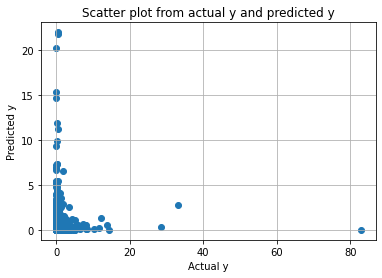

In [12]:
#Model #2:  SGD Regressor set at defaults (max iter = 1000, penalty = "l2", alpha = 0.000, learning_rate = "invscaling")

sgd_reg2_= SGDRegressor()
sgd_reg2_.fit(X_train_scaled, y_train)


y_pred_sgd2=sgd_reg2_.predict(X_val_scaled)
print("mse:",mean_squared_error(y_val, y_pred_sgd2))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred_sgd2)))
print("r-squared:", r2_score(y_val, y_pred_sgd2))
print("training time:", timeit.timeit())

plt.scatter(y_test,y_pred_sgd2)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

#the r-square is negative, which is not possible. the mse & rmse are off the charts as well.  
#likely because data is not scaled.  data must be scaled to use an sgd.
#after scaling, the results look much better
#good Rsquared and good mse/rmse, but not as good as Model #1 

mse: 0.000516775933220505
rmse: 0.022732706244978952
r-squared: 0.9997491953261
training time: 0.0074896999999998215


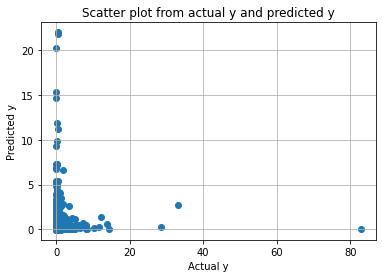

In [13]:
#Model #3:  SGD Regressor  (Changed penalty to l1)

sgd_reg3_= SGDRegressor(max_iter = 1000, penalty = "l1", alpha = 0.0, learning_rate = "invscaling")
sgd_reg3_.fit(X_train_scaled, y_train)


y_pred_sgd3=sgd_reg3_.predict(X_val_scaled)
print("mse:",mean_squared_error(y_val, y_pred_sgd3))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred_sgd3)))
print("r-squared:", r2_score(y_val, y_pred_sgd3))
print("training time:", timeit.timeit())

plt.scatter(y_test,y_pred_sgd3)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

#good results, but not as good as Model 2 or Model 3

mse: 0.10678496027993072
rmse: 0.3267796815591978
r-squared: 0.9481745077145199
training time: 0.012380300000000233


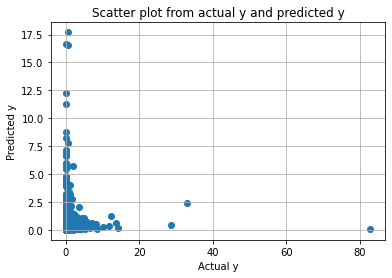

In [14]:
#Model #4:  SGD Regressor  (Changed alpha to 0.5)

sgd_reg4_= SGDRegressor(max_iter = 1000, penalty = "l2", alpha = 0.5, learning_rate = "invscaling")
sgd_reg4_.fit(X_train_scaled, y_train)


y_pred_sgd4=sgd_reg4_.predict(X_val_scaled)
print("mse:",mean_squared_error(y_val, y_pred_sgd4))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred_sgd4)))
print("r-squared:", r2_score(y_val, y_pred_sgd4))
print("training time:", timeit.timeit())

plt.scatter(y_test,y_pred_sgd4)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

#not as good as other models, poorest model of all

mse: 0.19787623143375668
rmse: 0.4448328129013829
r-squared: 0.9039655670726754
training time: 0.008522999999999392


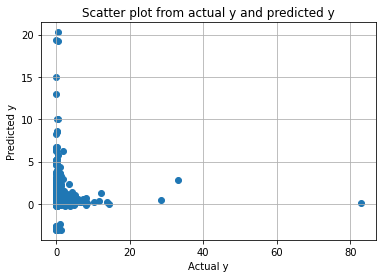

In [15]:
#Model #5:  SGD Regressor s(Changed alpha to 0.5 & learning Rate to Optimal, then had to change max iter to 10K to converge)

sgd_reg5_= SGDRegressor(max_iter = 10000, penalty = "l2", alpha = 0.2, learning_rate = "optimal")
sgd_reg5_.fit(X_train_scaled, y_train)


y_pred_sgd5=sgd_reg5_.predict(X_val_scaled)
print("mse:",mean_squared_error(y_val, y_pred_sgd5))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred_sgd5)))
print("r-squared:", r2_score(y_val, y_pred_sgd5))
print("training time:", timeit.timeit())

plt.scatter(y_test,y_pred_sgd5)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

#NOT AS bad as model #4

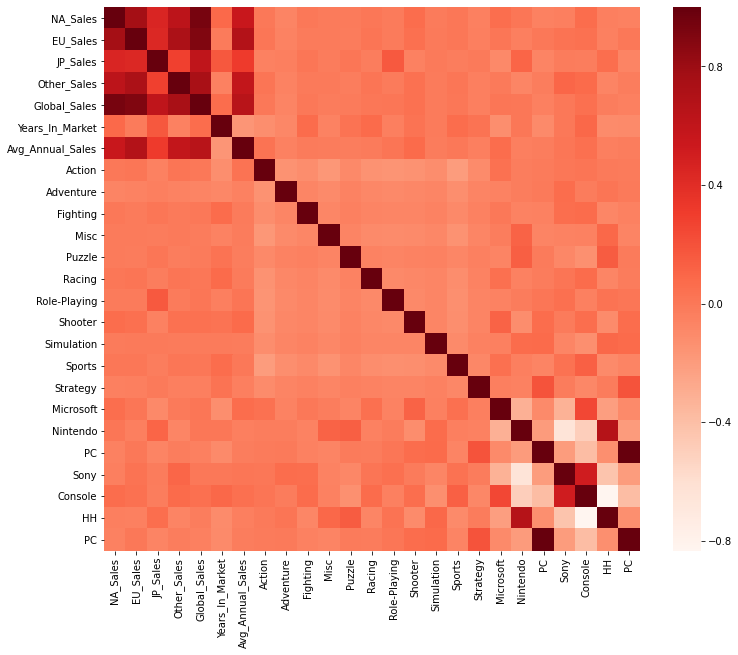

In [16]:
#Filter Method for Feature Selection - select features if 50%+ correlation to Global Sales and remove those with
#multi-collinearity

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = vgsales_df2.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)

plt.show()

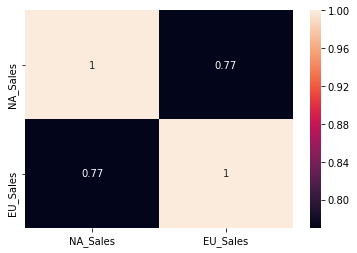

In [17]:
sns.heatmap(vgsales_df2[['NA_Sales',  'EU_Sales']].corr(), annot=True)






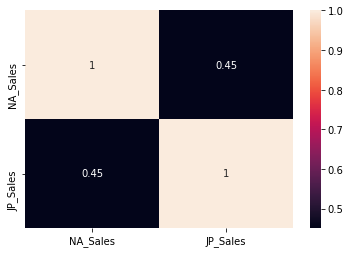

In [20]:
sns.heatmap(vgsales_df2[['NA_Sales',  'JP_Sales']].corr(), annot=True)

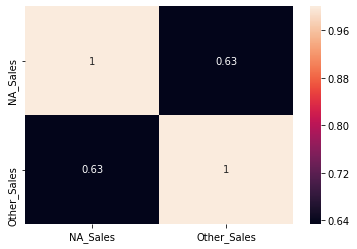

In [21]:
sns.heatmap(vgsales_df2[['NA_Sales',  'Other_Sales']].corr(), annot=True)

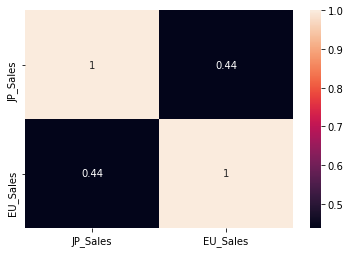

In [22]:
sns.heatmap(vgsales_df2[['JP_Sales',  'EU_Sales']].corr(), annot=True)

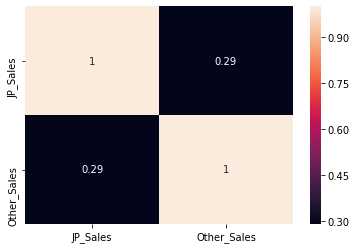

In [23]:
sns.heatmap(vgsales_df2[['JP_Sales',  'Other_Sales']].corr(), annot=True)

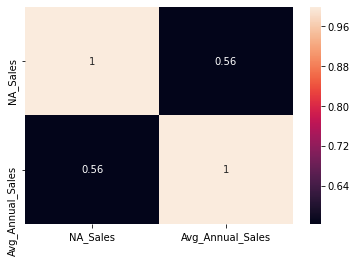

In [24]:
sns.heatmap(vgsales_df2[['NA_Sales',  'Avg_Annual_Sales']].corr(), annot=True)

In [25]:
#Correlation with output variable
cor_target = abs(cor["Global_Sales"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

#these variables are highly relevant to Global Sales
#drop Year_1_Sales because it is a formula we created

NA_Sales            0.941499
EU_Sales            0.903753
JP_Sales            0.613358
Other_Sales         0.747362
Global_Sales        1.000000
Avg_Annual_Sales    0.651782
Name: Global_Sales, dtype: float64

In [26]:
#check for multi-collinearity to determine which variables to keep and which to discard
print(vgsales_df2[["NA_Sales","EU_Sales"]].corr())
print(vgsales_df2[["NA_Sales","JP_Sales"]].corr())
print(vgsales_df2[["NA_Sales","Other_Sales"]].corr())
print(vgsales_df2[["NA_Sales","Avg_Annual_Sales"]].corr())
print(vgsales_df2[["EU_Sales","JP_Sales"]].corr())
print(vgsales_df2[["EU_Sales","Other_Sales"]].corr())
print(vgsales_df2[["EU_Sales","Avg_Annual_Sales"]].corr())
print(vgsales_df2[["Other_Sales","Avg_Annual_Sales"]].corr())
print(vgsales_df2[["JP_Sales","Other_Sales"]].corr())
print(vgsales_df2[["JP_Sales","Avg_Annual_Sales"]].corr())

#NA & EU Sales highly correlated, remove EU Sales
#NA & Other Sales highly correlated, remove Other Sales
#NA & Avg ANnual Sales highly correlated, remove avg annual sales

#the problem is this method recommends we remove the platform type, first-party and genres
#we don't really know what drives NA Sales which drives global sales


          NA_Sales  EU_Sales
NA_Sales  1.000000  0.770262
EU_Sales  0.770262  1.000000
          NA_Sales  JP_Sales
NA_Sales  1.000000  0.451618
JP_Sales  0.451618  1.000000
             NA_Sales  Other_Sales
NA_Sales     1.000000     0.634225
Other_Sales  0.634225     1.000000
                  NA_Sales  Avg_Annual_Sales
NA_Sales          1.000000          0.562703
Avg_Annual_Sales  0.562703          1.000000
          EU_Sales  JP_Sales
EU_Sales  1.000000  0.437859
JP_Sales  0.437859  1.000000
             EU_Sales  Other_Sales
EU_Sales     1.000000     0.725572
Other_Sales  0.725572     1.000000
                  EU_Sales  Avg_Annual_Sales
EU_Sales          1.000000          0.684697
Avg_Annual_Sales  0.684697          1.000000
                  Other_Sales  Avg_Annual_Sales
Other_Sales           1.00000           0.59193
Avg_Annual_Sales      0.59193           1.00000
             JP_Sales  Other_Sales
JP_Sales     1.000000     0.290955
Other_Sales  0.290955     1.000000
          

In [42]:
#wrapper method - considered better than filter method bc you add/remove features based on model performance
#backward method = add all possible features and remove iteratively based on perfomance
#performance is defined by p-value, >0.05, we remove

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_train)
#Fitting sm.OLS model
model = sm.OLS(y_train,X_1).fit()
model.pvalues





const               0.818791
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Years_In_Market     0.681603
Avg_Annual_Sales    0.534846
Action              0.622199
Adventure           0.561690
Fighting            0.131010
Misc                0.853590
Puzzle              0.241280
Racing              0.897881
Role-Playing        0.280065
Shooter             0.713289
Simulation          0.930271
Sports              0.783636
Strategy            0.866727
Microsoft           0.582783
Nintendo            0.662784
PC                  0.043663
Sony                0.091463
Console             0.234569
HH                  0.295066
PC                  0.043663
dtype: float64

In [28]:
#Backward Elimination
cols_Xtrain = list(X_train.columns)
print(cols_Xtrain)

cols_X1 = list(X_1.columns)
print(cols_X1)



['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Years_In_Market', 'Avg_Annual_Sales', 'Action', 'Adventure', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 'Microsoft', 'Nintendo', 'PC', 'Sony', 'Console', 'HH', 'PC']
['const', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Years_In_Market', 'Avg_Annual_Sales', 'Action', 'Adventure', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 'Microsoft', 'Nintendo', 'PC', 'Sony', 'Console', 'HH', 'PC']


In [29]:
p = pd.Series(model.pvalues.values[1:])
print(p)
p.shape

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.681603
5     0.534846
6     0.622199
7     0.561690
8     0.131010
9     0.853590
10    0.241280
11    0.897881
12    0.280065
13    0.713289
14    0.930271
15    0.783636
16    0.866727
17    0.582783
18    0.662784
19    0.043663
20    0.091463
21    0.234569
22    0.295066
23    0.043663
dtype: float64


(24,)

In [30]:
#run the model with the optimal # of features

cols2 = list(X_train.columns)
#best # of  features of model based on result in the next sell
model2 = LinearRegression()
#Initializing RFE model
rfe = RFE(model2, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
model2.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

temp = pd.Series(rfe.support_,index = cols2)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

#recommends EU Sales and not include other features

[ True  True  True  True False False False False False False  True False
 False False False False False False False  True  True  True  True  True]
[ 1  1  1  1 15  9 11 10  2 13  1  8  5  6 14 12  7  3  4  1  1  1  1  1]
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Puzzle', 'PC',
       'Sony', 'Console', 'HH', 'PC'],
      dtype='object')


In [31]:
#find the optimal # of features

#no of features
nof_list=np.arange(1,30)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model3 = LinearRegression()
    rfe2 = RFE(model3,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model3.fit(X_train_rfe,y_train)
    score = model3.score(X_val_rfe,y_val)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.999987


In [32]:
#embeded feature selection

lasso_reg = LassoCV()
lasso_reg.fit(X_train_scaled, y_train)
print("Best alpha using built-in LassoCV: %f" % lasso_reg.alpha_)
print("Best score using built-in LassoCV: %f" % lasso_reg.score(X,y))
coef = pd.Series(lasso_reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 0.001326
Best score using built-in LassoCV: 0.767027


C:\Users\kyoun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [33]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 20 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

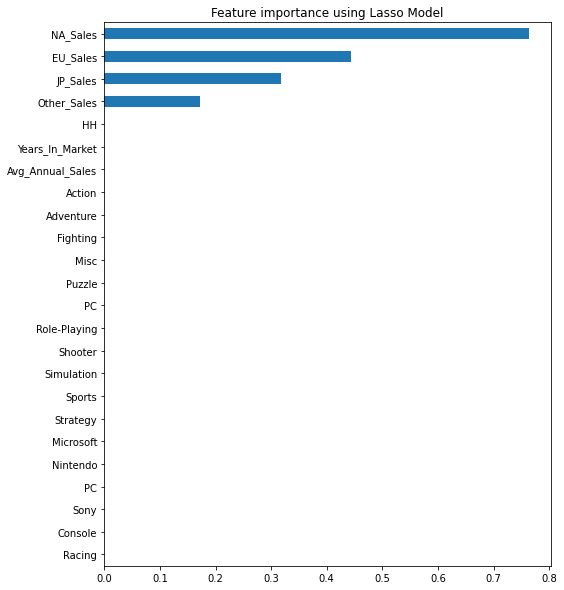

In [34]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#keep the regional sales only and eliminate other features
#But EU and Other Sales have high multicollinearity with, should only keep NA Sales and JP Sales

In [35]:
pmax = 1
while (len(cols_Xtrain)>0):
    p= []
    p = pd.Series(model.pvalues.values[1:],index = cols_Xtrain)     
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols_Xtrain.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols_Xtrain
print(selected_features_BE)

#cannot run because the p returns more columns than the index, it is counting the constant whereas the index does not

ValueError: Length of passed values is 24, index implies 23